In [ ]:
#mounting the drive to load images 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the related libraries
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
#function to load all images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append(img)
    return images

In [ ]:
#importing all input images from google drive (20 in total)
img_list = load_images_from_folder("drive/MyDrive/BioVision PA3 images")

Image 0
(427, 640)


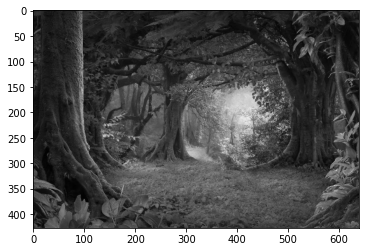

Image 1
(480, 640)


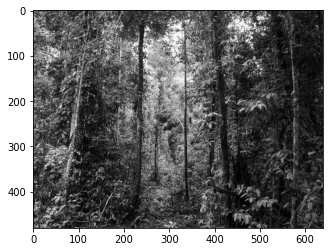

Image 2
(426, 640)


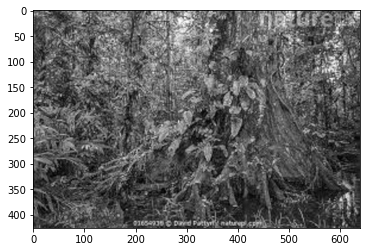

Image 3
(360, 640)


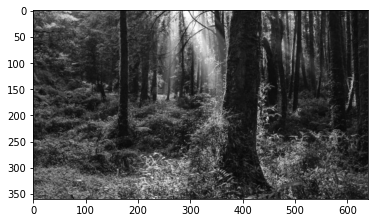

Image 4
(436, 640)


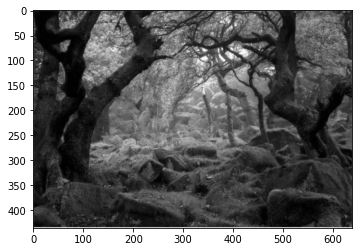

Image 5
(377, 640)


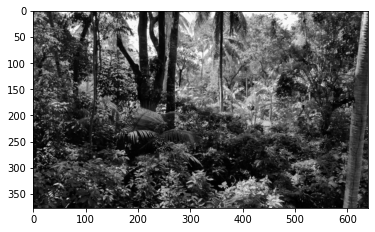

Image 6
(418, 640)


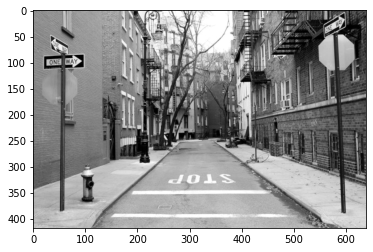

Image 7
(960, 640)


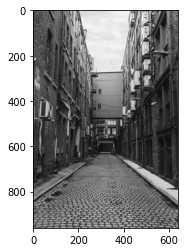

Image 8
(360, 640)


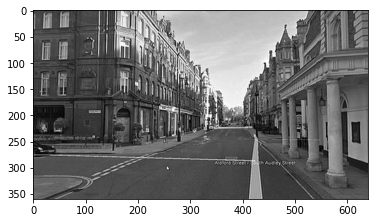

Image 9
(421, 640)


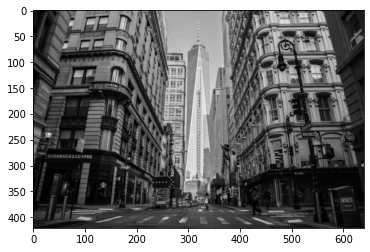

Image 10
(853, 640)


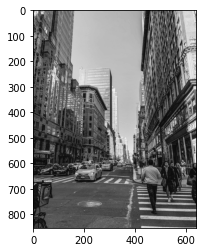

Image 11
(427, 640)


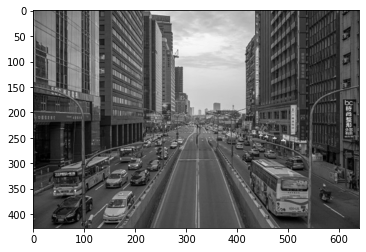

Image 12
(321, 640)


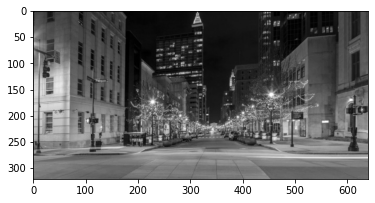

Image 13
(960, 640)


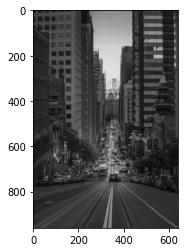

Image 14
(480, 640)


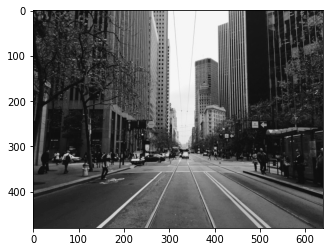

Image 15
(360, 640)


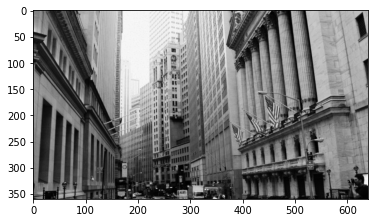

Image 16
(421, 640)


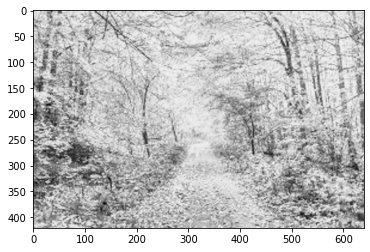

Image 17
(480, 640)


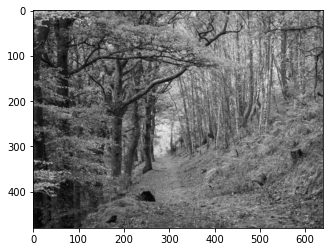

Image 18
(360, 640)


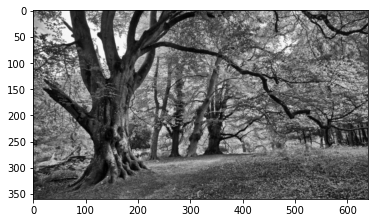

Image 19
(640, 640)


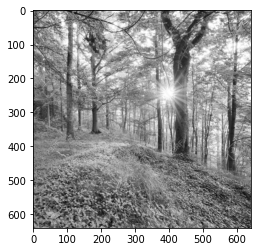

In [ ]:
#printing the details of the input images
for index,img in enumerate(img_list):
  print("Image",index)
  print(img.shape)
  plt.imshow(img, cmap='gray')
  plt.show()


Image 0


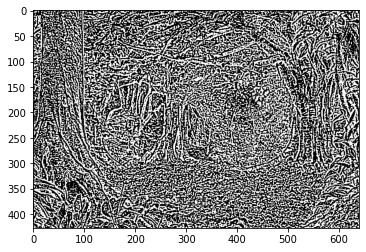

Image 1


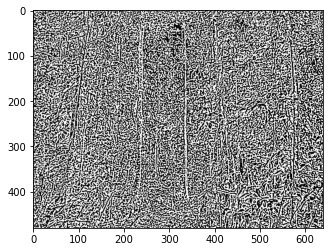

Image 2


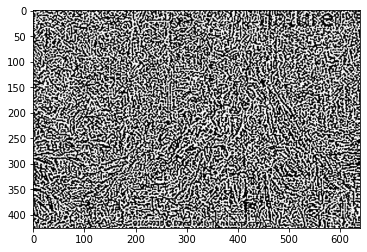

Image 3


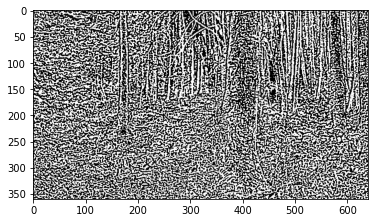

Image 4


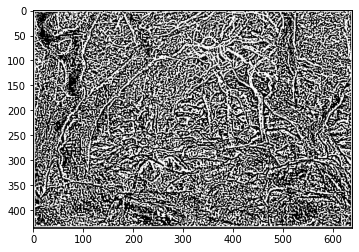

Image 5


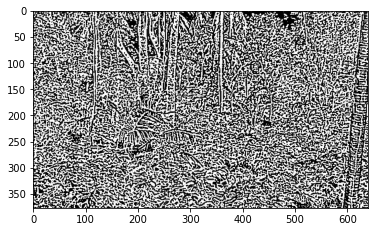

Image 6


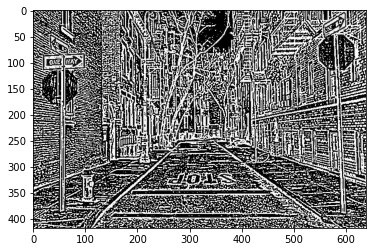

Image 7


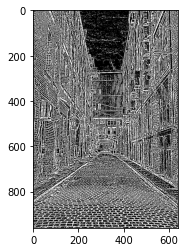

Image 8


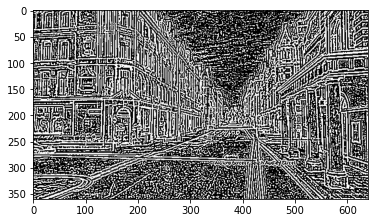

Image 9


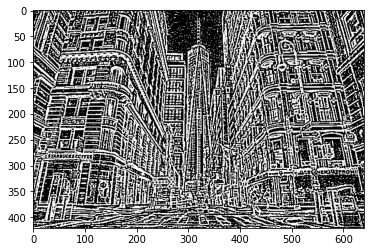

Image 10


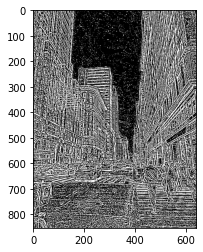

Image 11


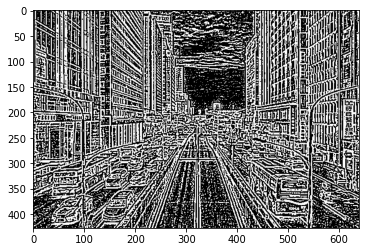

Image 12


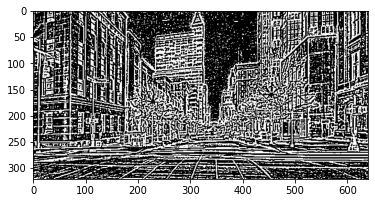

Image 13


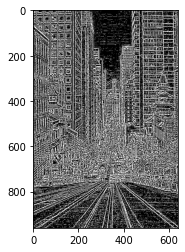

Image 14


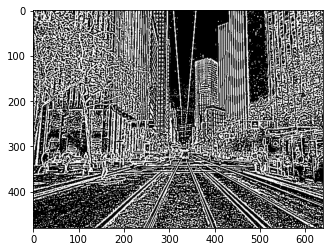

Image 15


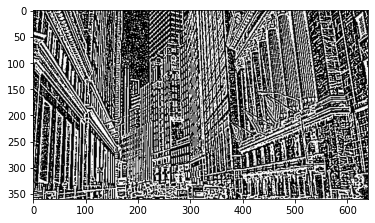

Image 16


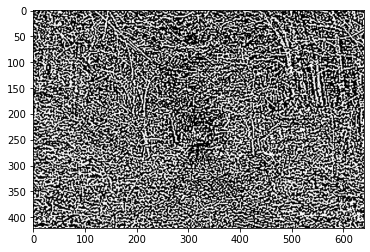

Image 17


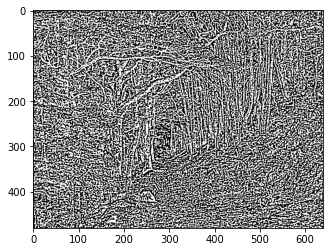

Image 18


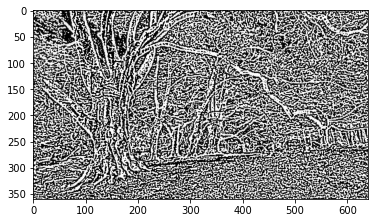

Image 19


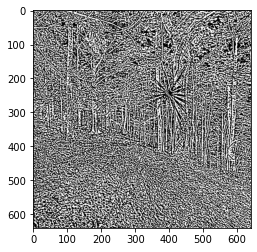

In [ ]:
#initializing lower standard deviation
low_sd = 1
#initializing lower standard deviation
high_sd = 2

#defining a list to store all DoG outputs
DoG_list = []

#iterating all 20 images to generate image specific DoG output
for index,img in enumerate(img_list):
  
  #applying gaussian filters
  gblow = cv2.GaussianBlur(img,(3,3),low_sd)          
  gbhigh = cv2.GaussianBlur(img,(5,5),high_sd)

  #obtaining DoG output
  DoG = abs(gblow - gbhigh)

  #adding the output in a list
  DoG_list.append(DoG)

  #printing the DoG output for each image
  print("Image",index)
  plt.imshow(DoG, cmap='gray')
  plt.show()

In [ ]:
#defining the filter corresponding to various orientations
degree = [0,45,90,135]
filters = [np.array([[-1, -1, -1],[2, 2, 2],[-1, -1, -1]]), np.array([[-1, -1, 2],[-1, 2, -1],[2, -1, -1]]),
           np.array([[-1, 2, -1],[-1, 2, -1],[-1, 2, -1]]),np.array([[2, -1, -1],[-1, 2, -1],[-1, -1, 2]])]

#intializing 4 list to store the output corresponding to 4 filter
degree0_filtered_list = []
degree45_filtered_list = []
degree90_filtered_list = []
degree135_filtered_list = []

#iterating over each DoG output to obtain oriented filter output 
for DoG in DoG_list:
  # 0-degree filter
  filtered_img = cv2.filter2D(DoG, -1, filters[0])
  degree0_filtered_list.append(filtered_img)

  #45-degree filter
  filtered_img = cv2.filter2D(DoG, -1, filters[1])
  degree45_filtered_list.append(filtered_img)

  #90-degree filter
  filtered_img = cv2.filter2D(DoG, -1, filters[2])
  degree90_filtered_list.append(filtered_img)

  #135-degree filter
  filtered_img = cv2.filter2D(DoG, -1, filters[3])
  degree135_filtered_list.append(filtered_img) 


In [ ]:
#intializing the spatial envelop representation to all zeros
hist_vectors = np.zeros((20,5))

#iterating for each 20 images
for i in range(20):
  #iterating for each pixel in an image
  for row in range(img_list[i].shape[0]):
    for col in range(img_list[i].shape[1]):

      index = 4
      max_orientation = 0

      #finding the maximum intensity orientation or zero intensity presence
      if degree0_filtered_list[i][row][col] > max_orientation:
        index =0
        max_orientation = degree0_filtered_list[i][row][col]
      if degree45_filtered_list[i][row][col] > max_orientation:
        index =1
        max_orientation = degree45_filtered_list[i][row][col]
      if degree90_filtered_list[i][row][col] > max_orientation:
        index =2
        max_orientation = degree90_filtered_list[i][row][col]
      if degree135_filtered_list[i][row][col] > max_orientation:
        index =3
        max_orientation = degree135_filtered_list[i][row][col]
      
      #incrementing the value of highest intensity position in histogram vector
      hist_vectors[i][index] += 1

#printing the representation obtained for all images
print(hist_vectors)

[[ 92374.  62960.  52762.  42920.  22264.]
 [ 97466.  71656.  61977.  51624.  24477.]
 [ 84974.  62665.  57745.  46817.  20439.]
 [ 75795.  52740.  46168.  36595.  19102.]
 [ 94065.  63687.  54082.  44161.  23045.]
 [ 78176.  55269.  48624.  39280.  19931.]
 [ 86251.  59475.  57438.  42133.  22223.]
 [191615. 132870. 133693.  94018.  62204.]
 [ 73415.  51113.  52028.  35592.  18252.]
 [ 85697.  58839.  58736.  41331.  24837.]
 [158788. 112279. 115462.  80556.  78835.]
 [ 83899.  58486.  64018.  40304.  26573.]
 [ 68229.  42898.  41255.  28057.  25001.]
 [198519. 128638. 124859.  85945.  76439.]
 [ 90925.  63310.  66363.  44562.  42040.]
 [ 66008.  49270.  60833.  36212.  18077.]
 [ 89206.  62263.  53233.  45729.  19009.]
 [100124.  70743.  61094.  51369.  23870.]
 [ 75905.  53162.  44788.  38372.  18173.]
 [132624.  95590.  82012.  67615.  31759.]]


In [ ]:
#normalising the above obtained vector to get the sum of each row equal to one
for i in range(20):
  total = hist_vectors[i][0] + hist_vectors[i][1]+ hist_vectors[i][2]+ hist_vectors[i][3]+ hist_vectors[i][4]
  for index,value in enumerate(hist_vectors[i]):
    hist_vectors[i][index] /= total

#printing the normalized vectors
print(hist_vectors)

[[0.33801961 0.23038642 0.19306938 0.15705504 0.08146956]
 [0.31727214 0.23325521 0.20174805 0.16804688 0.07967773]
 [0.31167107 0.22984522 0.21179944 0.17171728 0.07496699]
 [0.32897135 0.22890625 0.20038194 0.15883247 0.08290799]
 [0.33710221 0.2282361  0.19381451 0.15826046 0.08258673]
 [0.32400531 0.22906582 0.2015252  0.16279841 0.08260527]
 [0.32240954 0.22231983 0.21470544 0.15749477 0.08307042]
 [0.31187337 0.21625977 0.21759928 0.15302409 0.10124349]
 [0.31864149 0.22184462 0.22581597 0.15447917 0.07921875]
 [0.31805597 0.21837515 0.21799287 0.15339593 0.09218008]
 [0.29086313 0.20566933 0.21149985 0.14756008 0.14440761]
 [0.30700746 0.21401493 0.2342579  0.14748244 0.09723727]
 [0.33211157 0.20881036 0.20081289 0.13657029 0.1216949 ]
 [0.32311035 0.20937174 0.20322103 0.13988444 0.12441243]
 [0.29597982 0.20608724 0.21602539 0.14505859 0.13684896]
 [0.28649306 0.21384549 0.26403212 0.15717014 0.0784592 ]
 [0.33107928 0.23108299 0.19756903 0.16971868 0.07055003]
 [0.32592448 0

In [ ]:
#Applying k-mean algorithm over the spatial envelop representation 
kmeans = KMeans(n_clusters=2).fit(hist_vectors)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
#getting the index of images belonging to the cluster
cluster_one = np.where(kmeans.labels_ == 1)[0]
cluster_zero = np.where(kmeans.labels_ == 0)[0]

In [ ]:
print(cluster_one+1)
print(cluster_zero+1)

[ 8 11 12 13 14 15 16]
[ 1  2  3  4  5  6  7  9 10 17 18 19 20]


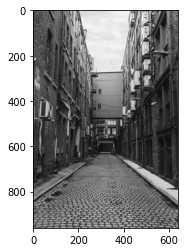

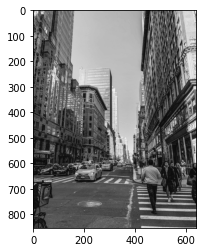

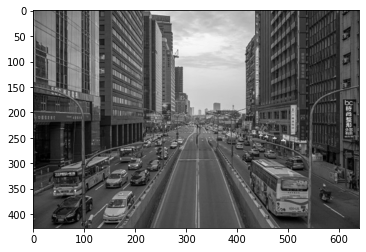

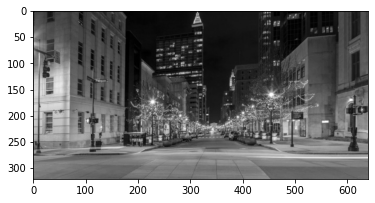

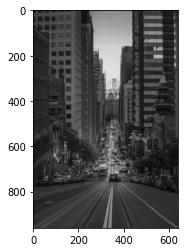

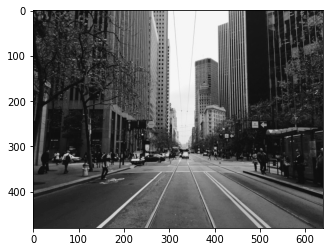

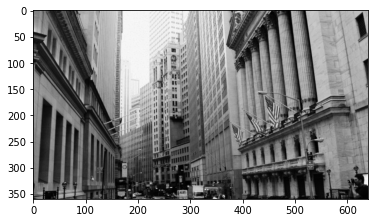

In [ ]:
#printing the images belongs to the cluster one
for index in cluster_one:
  plt.imshow(img_list[index], cmap='gray')
  plt.show()

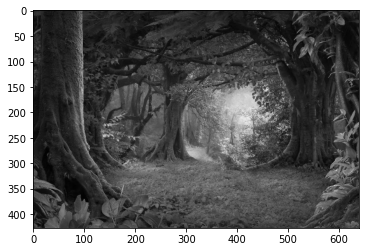

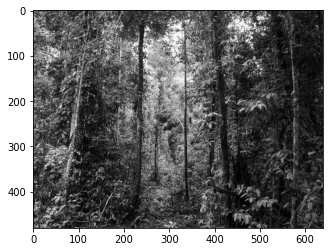

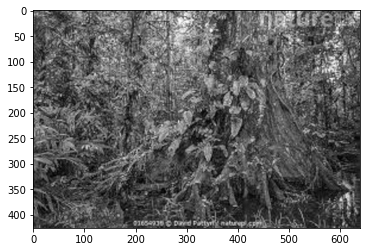

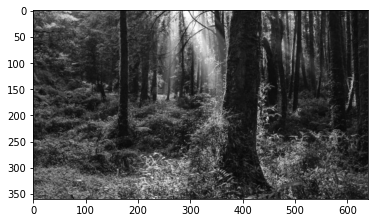

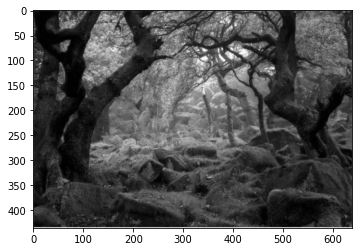

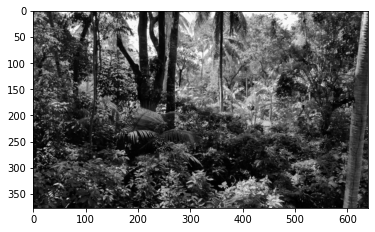

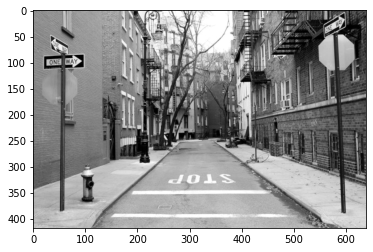

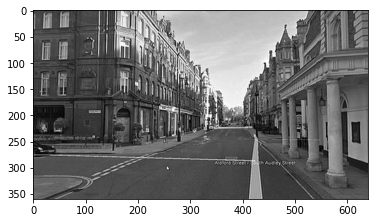

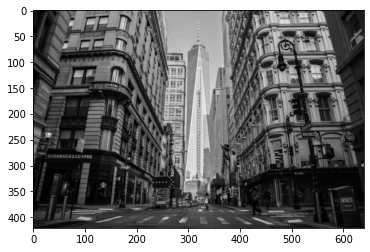

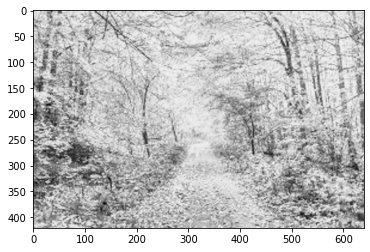

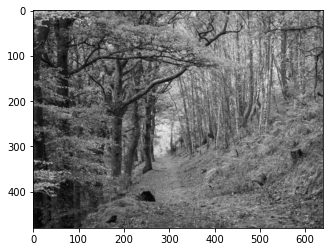

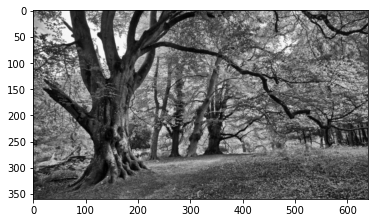

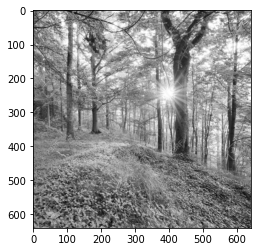

In [ ]:
#printing the elements of cluster zero
for index in cluster_zero:
  plt.imshow(img_list[index], cmap='gray')
  plt.show()